## Importing the necessary Libraries

In [308]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Ignoring all warnings
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [309]:
data = pd.read_csv('Data_inc.csv')

In [310]:
data.shape

(32561, 16)

In [311]:
data.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


###### The shape shows that there is one extra column compared to the Data Structure provided. Having a look at the top 5 rows, an Unnamed column is found which needs to be handled.

In [312]:
data.info()  # Getting basic information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               32561 non-null  int64  
 1   Profession Class  32561 non-null  object 
 2   Final_census      32561 non-null  int64  
 3    Education        32561 non-null  object 
 4    Education-num    32561 non-null  int64  
 5    marital-status   32561 non-null  object 
 6    occupation       32561 non-null  object 
 7    relationship     32561 non-null  object 
 8    race             32561 non-null  object 
 9   Gender            32561 non-null  object 
 10   capital-gain     32561 non-null  int64  
 11   capital-loss     32561 non-null  int64  
 12   hours-per-week   32561 non-null  int64  
 13   country          32561 non-null  object 
 14   income           32561 non-null  object 
 15  Unnamed: 15       2 non-null      float64
dtypes: float64(1), int64(6), object(9)
memor

###### We can see that the column 'Unnamed: 15' has only 2 non-null values in 32561 rows. These values may have been added by mistake and the column should be dropped.
###### No other column has null values and the data type of all columns is also what we expect. However, some of the column names have extra spaces which can be trimmed.

In [313]:
data.describe()  # Statistical description for numeric data

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week,Unnamed: 15
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,2.0
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,55000.0
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.0
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,55000.0
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,55000.0
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,55000.0
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,55000.0
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,55000.0


###### Some values in the data seem to be too extreme like hours-per-week ranging from 1 to 99 (around 20 hours per day if it is a 5-day work week). Also capital-gain and capital-loss have all values in bottom 75 percentile as 0. These may be due to presence of outliers.

In [314]:
data.describe(include = ['O'])  # Statistical description for object type data

,Profession Class,Education,marital-status,occupation,relationship,race,Gender,country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


###### All these columns need to be encoded before modelling. Target column income has 2 unique values making it binary classification problem.

In [315]:
# Checking the unique values in each column
for i in data.columns:
    print(f'Unique values in {i} are:', data[i].unique(), sep = '\n')
    print('--------------------------------------------------------')

Unique values in Age are:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
--------------------------------------------------------
Unique values in Profession Class are:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
--------------------------------------------------------
Unique values in Final_census are:
[ 77516  83311 215646 ...  34066  84661 257302]
--------------------------------------------------------
Unique values in  Education are:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
--------------------------------------------------------
Unique values in  Education-num are:
[13  9  7 14  5 

###### Some of the columns contain the value ? which indicates missing data. Also most string values contain extra spaces which can be trimmed.

In [316]:
# Checking the value counts for each column
for i in data.columns:
    print(f'Counts of each unique value in {i} are:', data[i].value_counts(), sep = '\n')
    print('----------------------------------------------------------------------------')

Counts of each unique value in Age are:
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
----------------------------------------------------------------------------
Counts of each unique value in Profession Class are:
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Profession Class, dtype: int64
----------------------------------------------------------------------------
Counts of each unique value in Final_census are:
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: Final_census, Length: 21648, dtype: int64
----------------------------------------------------------------------------
Counts of 

###### Columns Education and Education-num seem to be conveying the same information and their value counts are also exactly in sequence. One of these should be dropped after checking the relation between them.
###### Also Final_census column has very less count for each unique value making the information gain very less. This column can be dropped.

In [317]:
data.duplicated().sum()  # To check the number of duplicate rows

24

## Data Cleaning for EDA

In [318]:
# Creating separate datasets for EDA and modelling to maintain data integrity
eda_df = data.copy()

In [319]:
eda_df.drop(['Unnamed: 15'], axis = 1, inplace = True)  # Dropping the 'Unnamed: 15' column

In [320]:
eda_df.shape

(32561, 15)

In [321]:
eda_df.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [322]:
# Removing the extra spaces from column names
eda_df.rename(columns = lambda col : col.strip(), inplace = True)

In [323]:
eda_df.columns

Index(['Age', 'Profession Class', 'Final_census', 'Education', 'Education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'Gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'income'],
      dtype='object')

In [324]:
# Removing extra spaces from entire dataframe
eda_df = eda_df.applymap(lambda x : x.strip() if isinstance(x, str) else x)

### Treating the missing values

In [325]:
for i in eda_df.columns:
    print(f'No. of missing values in {i} are:', len(eda_df[eda_df[i] == '?']))

No. of missing values in Age are: 0
No. of missing values in Profession Class are: 1836
No. of missing values in Final_census are: 0
No. of missing values in Education are: 0
No. of missing values in Education-num are: 0
No. of missing values in marital-status are: 0
No. of missing values in occupation are: 1843
No. of missing values in relationship are: 0
No. of missing values in race are: 0
No. of missing values in Gender are: 0
No. of missing values in capital-gain are: 0
No. of missing values in capital-loss are: 0
No. of missing values in hours-per-week are: 0
No. of missing values in country are: 583
No. of missing values in income are: 0


In [326]:
# Calculating the percentage of missing values in occupation column
len(eda_df[eda_df['occupation'] == '?']) / len(eda_df['occupation']) * 100

5.660145572924664

###### As the percentage of missing values in columns range from 0 to 5.66% and each of the columns with missing values is categorical, we can impute them with mode.
###### Also, the missing values in Profession Class and occupation may be related.

In [327]:
# Checking for the number of rows for which both Profession Class and occupation are missing
len(eda_df[(eda_df['Profession Class'] == '?') & (eda_df['occupation'] == '?')])

1836

###### It is observed that the number of rows in which both columns have missing values is same as the number of missing values in Profession Class. In other words, occupation is missing too whenever Profession Class has missing values.

In [328]:
# Checking for the values where occupation is missing but Professional Class is not
eda_df[(eda_df['Profession Class'] != '?') & (eda_df['occupation'] == '?')]

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
5361,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


In [329]:
eda_df['Profession Class'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Profession Class, dtype: int64

###### Additionally, it is observed that for the 7 values for which Profession Class is 'Never-worked', occupation is missing too which makes sense.

In [330]:
# Creating a value of Not-working in occupation wherever Profession Class is 'Never-worked'
eda_df['occupation'] = np.where(eda_df['Profession Class'] == 'Never-worked', 'Not-working', eda_df['occupation'])

In [331]:
eda_df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1836
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Not-working             7
Name: occupation, dtype: int64

#### Profession Class column

In [332]:
eda_df['Profession Class'].replace('?', 'Private', inplace = True)  # Imputing missing values with Private (Mode)

In [333]:
eda_df['Profession Class'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Profession Class, dtype: int64

#### occupation column

In [334]:
eda_df['occupation'].replace('?', 'Prof-specialty', inplace = True)  # Imputing missing values with Prof-specialty (Mode)

In [335]:
eda_df['occupation'].value_counts()

Prof-specialty       5976
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Not-working             7
Name: occupation, dtype: int64

#### country column

In [336]:
eda_df['country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [337]:
eda_df['country'].replace('?', 'United-States', inplace = True)  # Imputing missing values with United-States (Mode)

In [338]:
for i in eda_df.columns:
    print(f'No. of missing values in {i} are:', len(eda_df[eda_df[i] == '?']))  # All missing values have been imputed.

No. of missing values in Age are: 0
No. of missing values in Profession Class are: 0
No. of missing values in Final_census are: 0
No. of missing values in Education are: 0
No. of missing values in Education-num are: 0
No. of missing values in marital-status are: 0
No. of missing values in occupation are: 0
No. of missing values in relationship are: 0
No. of missing values in race are: 0
No. of missing values in Gender are: 0
No. of missing values in capital-gain are: 0
No. of missing values in capital-loss are: 0
No. of missing values in hours-per-week are: 0
No. of missing values in country are: 0
No. of missing values in income are: 0


### Dropping unnecessary columns

#### Final_census column

In [339]:
# Number of unique values in Final_census column
eda_df['Final_census'].nunique()

21648

In [340]:
# Percentage of unique values in Final_census column
eda_df['Final_census'].nunique() / eda_df.shape[0] * 100

66.48444458094039

###### This shows that almost two thirds of the column Final_census has unique values. Hence there is very little information gained and this column should be dropped.

#### Education and Education-num columns

In [341]:
sorted(eda_df['Education-num'].unique())  # Education-num column contains all integer values from 1 to 16.

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [342]:
# Checking if the columns Education and Education-num are conveying the same information
for i in range(1, 17):
    filtered_data = eda_df[eda_df['Education-num'] == i]  # Contains data filtered for every unique value in Education-num
    print(f'No. of unique values in Education where Education-num = {i} are:', filtered_data['Education'].nunique())
    print('Unique values:', filtered_data['Education'].unique())

No. of unique values in Education where Education-num = 1 are: 1
Unique values: ['Preschool']
No. of unique values in Education where Education-num = 2 are: 1
Unique values: ['1st-4th']
No. of unique values in Education where Education-num = 3 are: 1
Unique values: ['5th-6th']
No. of unique values in Education where Education-num = 4 are: 1
Unique values: ['7th-8th']
No. of unique values in Education where Education-num = 5 are: 1
Unique values: ['9th']
No. of unique values in Education where Education-num = 6 are: 1
Unique values: ['10th']
No. of unique values in Education where Education-num = 7 are: 1
Unique values: ['11th']
No. of unique values in Education where Education-num = 8 are: 1
Unique values: ['12th']
No. of unique values in Education where Education-num = 9 are: 1
Unique values: ['HS-grad']
No. of unique values in Education where Education-num = 10 are: 1
Unique values: ['Some-college']
No. of unique values in Education where Education-num = 11 are: 1
Unique values: ['As

###### It is observed that the columns Education and Education-num convey the exact same information. Education-num is like a label-encoded version of Education column. As it is needed to encode the object type columns before modelling, Education column can be dropped.

In [343]:
eda_df.drop(['Final_census', 'Education'], axis = 1, inplace = True)  # Unnecessary columns dropped

In [344]:
eda_df.duplicated().sum()

3591

###### After making these changes, the number of duplicate rows has increased which should be dropped.

In [345]:
eda_df.drop_duplicates(inplace = True)  # Duplicate rows dropped

In [346]:
eda_df.shape

(28970, 13)

In [347]:
eda_df.head()

,Age,Profession Class,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


###### The data now looks clean for EDA.

# EDA

## Univariate Analysis

### Income column (Target)

In [348]:
eda_df['income'].value_counts()

<=50K    21790
>50K      7180
Name: income, dtype: int64

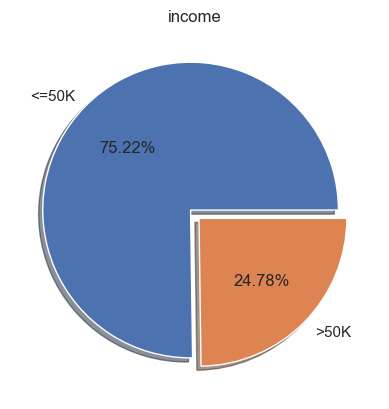

In [349]:
plt.pie(eda_df['income'].value_counts(), autopct = '%.2f%%', labels=['<=50K', '>50K'], explode=[0.04, 0.04], shadow = True)
plt.title('income')
plt.show()

###### The data has class imbalance as the target column has more than three fourths of the values as '<=50K'.

### Age column

<AxesSubplot:xlabel='Age', ylabel='Count'>

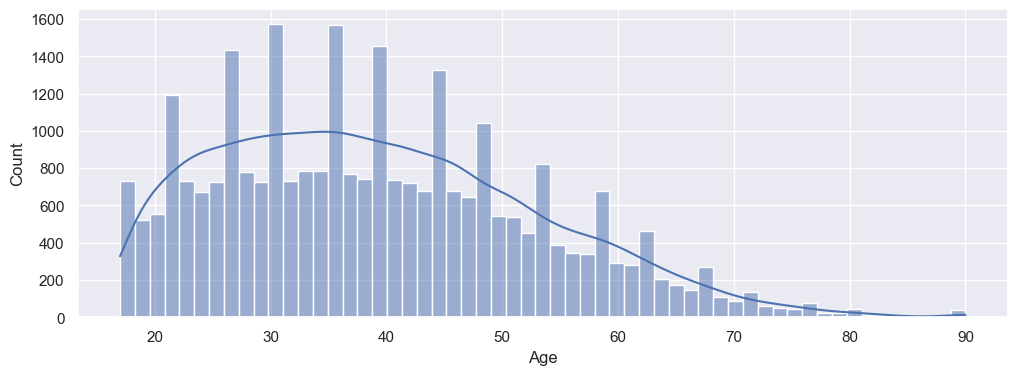

In [350]:
plt.figure(figsize = (12, 4))
sns.histplot(eda_df['Age'], kde = True)

###### Age column is right-skewed, which makes sense as the number of earning people is less after the age of 60 (retirement age in many places). Moreover, there are people in businesses who take premature retirement and some others may be facing health issues as well.
###### The bulk of the population ages between 20 and 45.

### Profession Class column

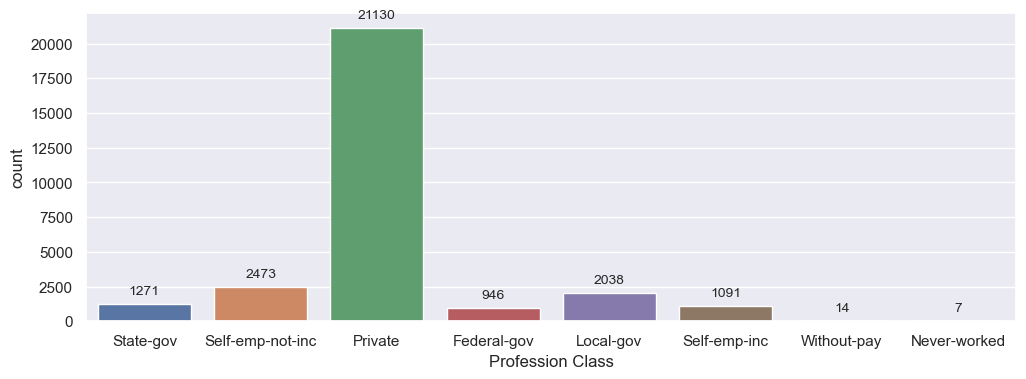

In [351]:
plt.figure(figsize = (12, 4))
ax = sns.countplot(eda_df['Profession Class'])

# Getting labels on top of bars to better visualise the categories with very less count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=10)

###### This shows that the most common Profession Class is Private. It is almost 8-9 times more common than the next most common category. It makes sense because most of the jobs available are in private sector. 
###### Some of these categories can be merged before modelling.

### Education-num column

<AxesSubplot:xlabel='Education-num', ylabel='count'>

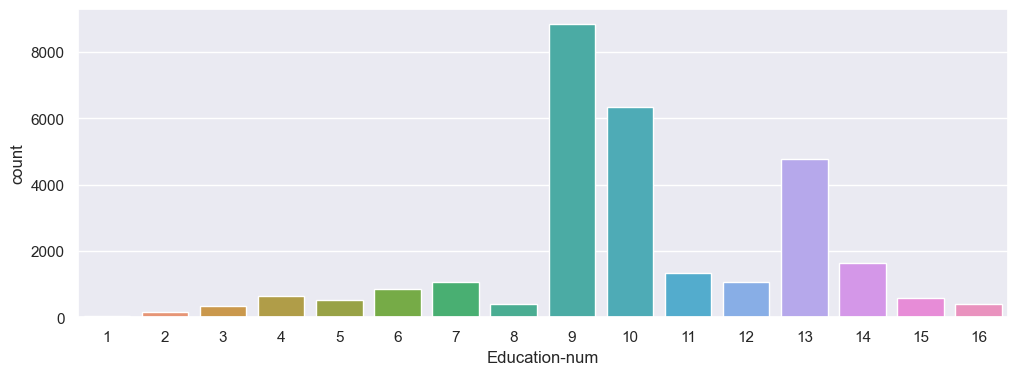

In [352]:
plt.figure(figsize = (12, 4))
sns.countplot(eda_df['Education-num'])

###### Majority of the people have spent more than 9 years on education. From the Education column which was previously dropped, we can see that 9-10 years of education which is the most common indicates HS-grad followed by some-college.

### Marital-status column

<AxesSubplot:xlabel='marital-status', ylabel='count'>

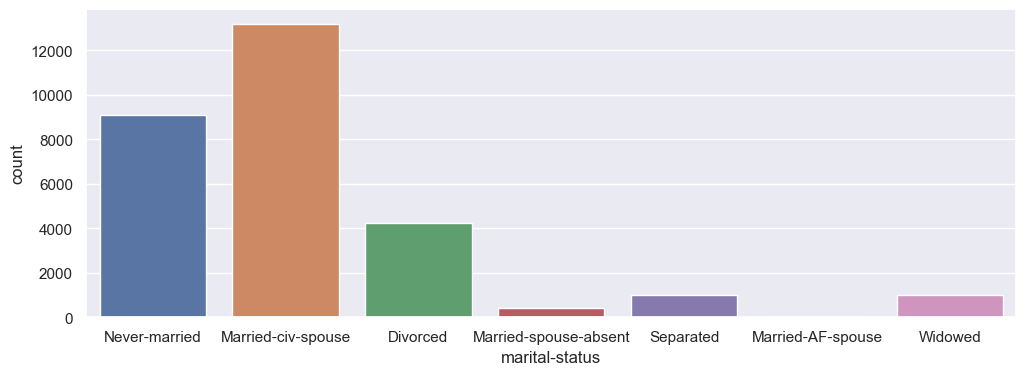

In [353]:
plt.figure(figsize = (12, 4))
sns.countplot(eda_df['marital-status'])

###### Majority of the people have marital status as 'Married-civ-spouse' and the least people have status as 'Married-AF-spouse'. This may be because most people have civilian spouses and having a spouse in Armed Forces is rare because of less opportunities and the amount of dedication required for Armed Forces.

### Occupation column

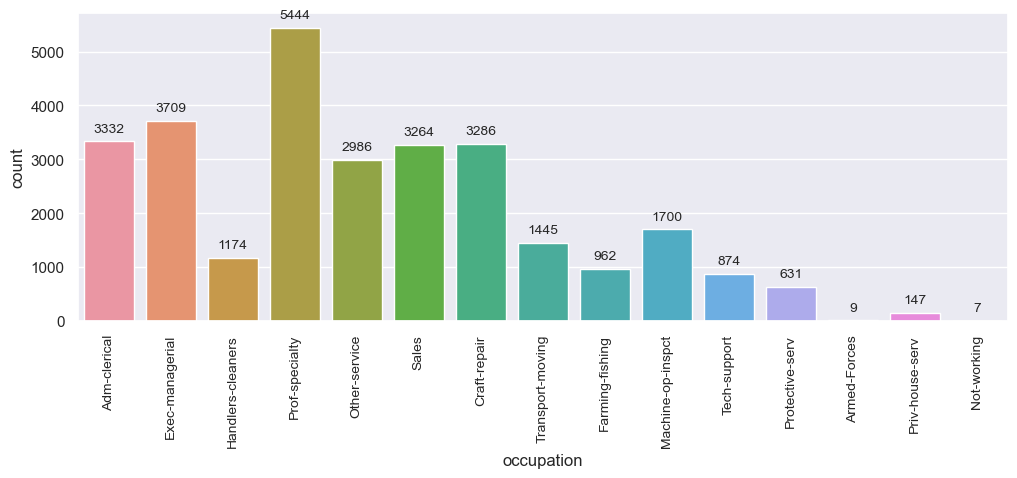

In [354]:
plt.figure(figsize = (12, 4))
ax = sns.countplot(eda_df['occupation'])
ax.tick_params(axis = 'x',labelsize = 10, labelrotation = 90)

# Getting labels on top of bars to better visualise the categories with very less count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=10)

###### The most common occupation in the data is Prof-specialty and the least common is Armed-Forces and Not-working. The data here is scattered into many categories with 5 categories having count more than 3000. Prof-specialty has higher count because missing values were imputed.

### Relationship column

<AxesSubplot:xlabel='relationship', ylabel='count'>

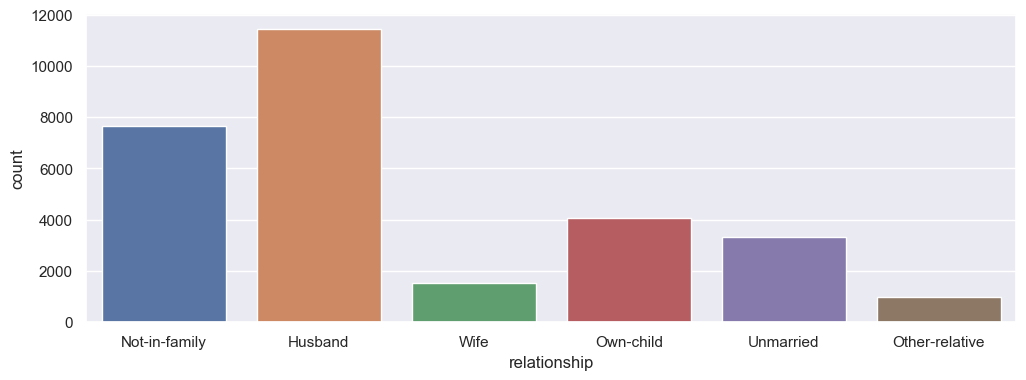

In [355]:
plt.figure(figsize = (12, 4))
sns.countplot(eda_df['relationship'])

###### This shows that most of the people in this data are husbands or not in family. The count of other-relative is the lowest showing that the people are bound mostly to spouse or child, or they aren't bound at all (Not-in-family or unmarried).

### Race column

In [356]:
eda_df['race'].value_counts()

White                 24318
Black                  3032
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

<AxesSubplot:xlabel='race', ylabel='count'>

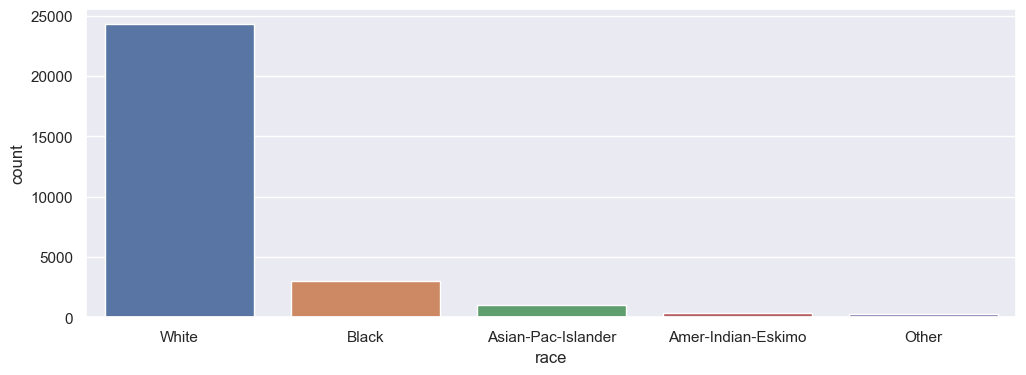

In [357]:
plt.figure(figsize = (12, 4))
sns.countplot(eda_df['race'])

###### White has a significantly high count in the race column. Its count is around 8 times that of the next highest, i.e. black.

### Gender column

In [358]:
eda_df['Gender'].value_counts()

Male      19151
Female     9819
Name: Gender, dtype: int64

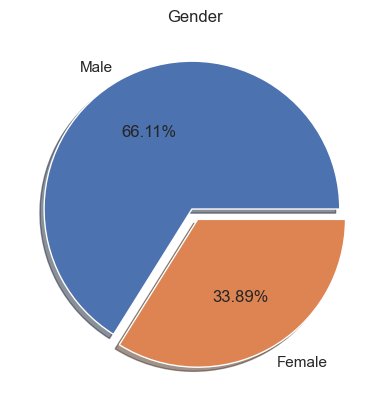

In [359]:
plt.pie(eda_df['Gender'].value_counts(), autopct= '%.2f%%', labels=['Male', 'Female'], explode= [0.04, 0.04], shadow= True)
plt.title('Gender')
plt.show()

###### In this data, the count of males is almost double the count of females.

### Capital-gain column

<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

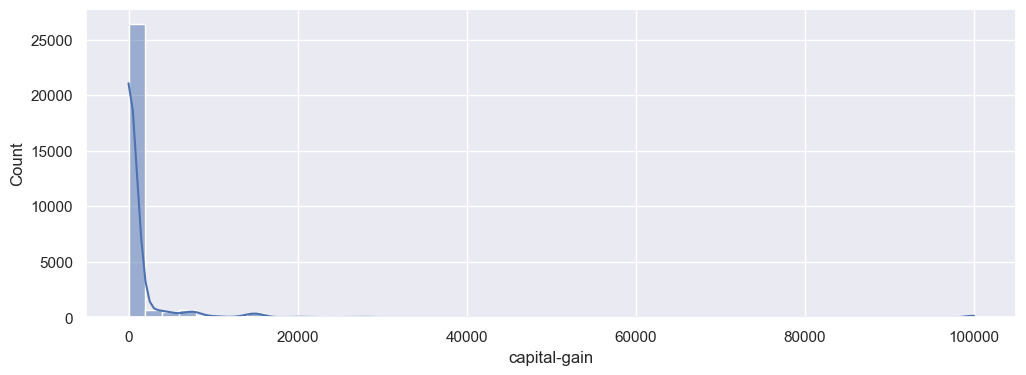

In [360]:
plt.figure(figsize = (12, 4))
sns.histplot(eda_df['capital-gain'], binwidth = 2000, kde = True)

###### Capital-gain column is highly right skewed with most of the values near 0. It indicates that people haven't earned much profit while selling capital assets. It may be due to not purchasing or selling assets at all. We saw earlier that most of the data is of people having private jobs so they may be sceptical of investing and incurring losses.

### Capital-loss column

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

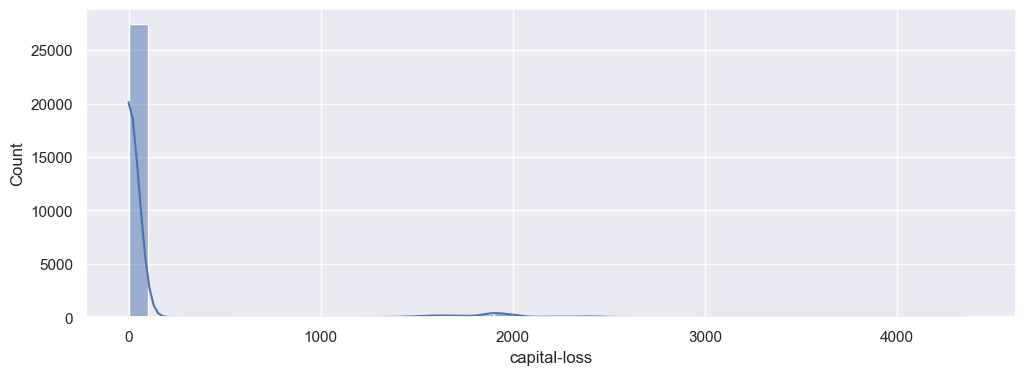

In [361]:
plt.figure(figsize = (12, 4))
sns.histplot(eda_df['capital-loss'], binwidth = 100, kde = True)

###### Capital-loss column is similar to capital-gain column and is highly right skewed with most of the values near 0. But the difference is that for capital-gain column the max value was around 1 lakh but for the capital-loss column the max value is less than 4.5K, which indicates that people aren't incurring huge losses.

### Hours-per-week column

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

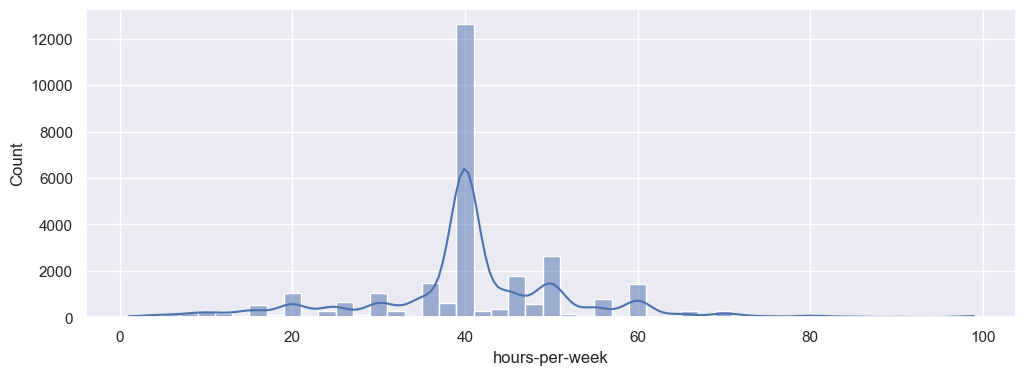

In [362]:
plt.figure(figsize = (12, 4))
sns.histplot(eda_df['hours-per-week'], binwidth = 2, kde = True)

###### The highest peak is observed at 40 hrs/week which is the usual 8 hrs/day for 5 days a week. This column doesn't seem to have much skewness and there are smaller bars both to the left and the right of 40.

### Country column

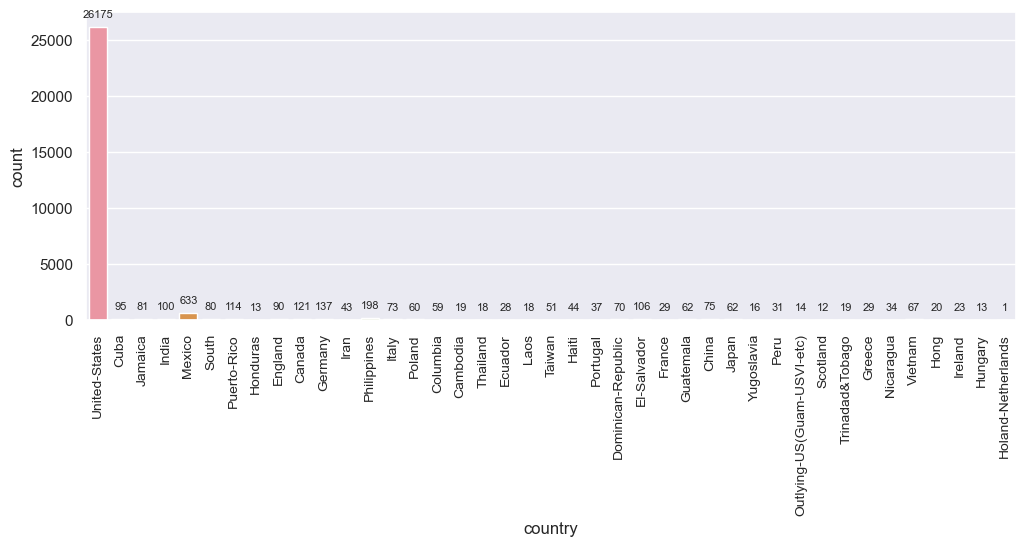

In [363]:
plt.figure(figsize = (12, 4))
ax = sns.countplot(eda_df['country'])
ax.tick_params(axis = 'x',labelsize = 10, labelrotation = 90)

# Getting labels on top of bars to better visualise the categories with very less count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=8)

In [364]:
len(eda_df[eda_df['country'] == 'United-States']) / len(eda_df['country']) * 100

90.3520883672765

###### Highest count in country column is of United States and it forms more than 90% of the values in country column. Other countries have so less count that all of them could be merged into one category before modelling.

## Bivariate Analysis

### Profession Class vs Income columns

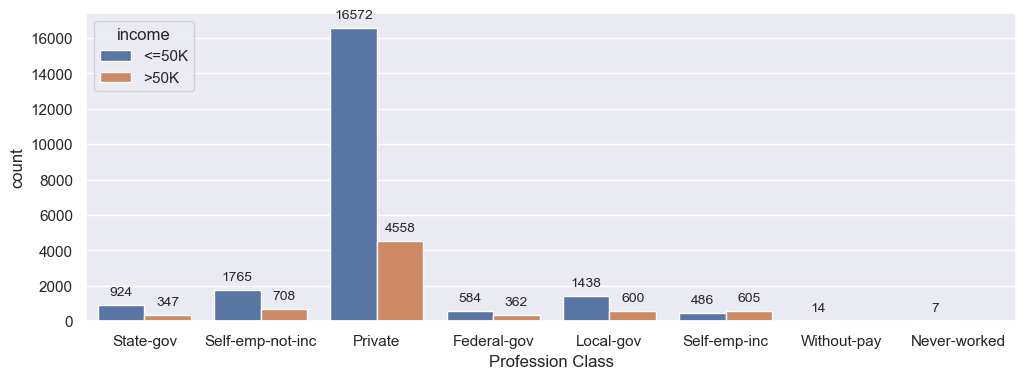

In [365]:
plt.figure(figsize = (12, 4))
ax = sns.countplot(eda_df['Profession Class'], hue = eda_df['income'])

# Getting labels on top of bars to better visualise the categories with very less count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=10)

###### In all the categories except Self-emp-inc, the ratio of people earning less than 50K is more than those earning more than 50K.

### Education-num  vs Income columns

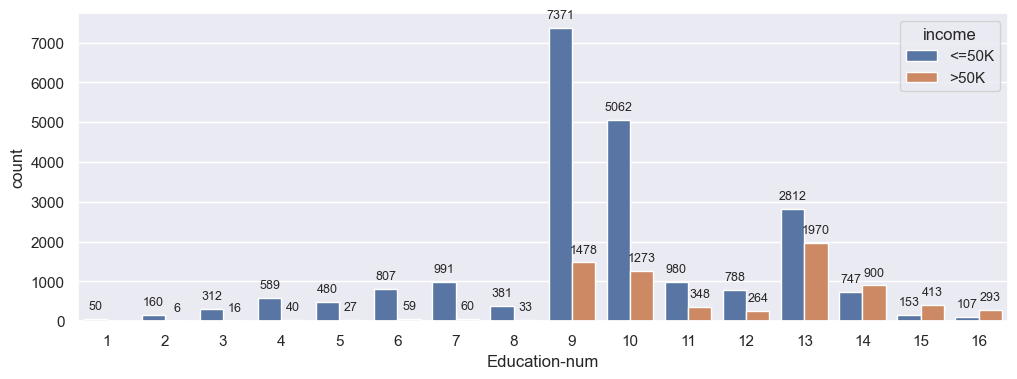

In [366]:
plt.figure(figsize = (12, 4))
ax = sns.countplot(eda_df['Education-num'], hue = eda_df['income'])

# Getting labels on top of bars to better visualise the categories with very less count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=9)

###### The people who have spent 14 or more years on studies have a higher chance of earning more than 50K.

### Marital-status  vs Income columns

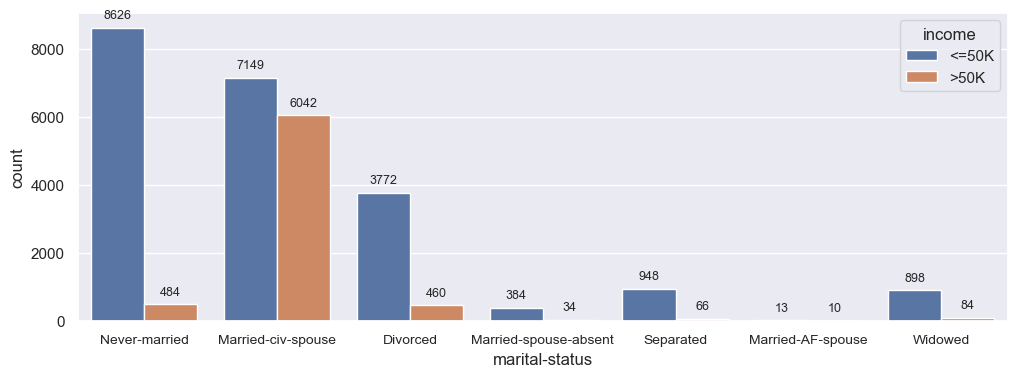

In [367]:
plt.figure(figsize = (12, 4))
ax = sns.countplot(eda_df['marital-status'], hue = eda_df['income'])
ax.tick_params(axis = 'x',labelsize = 10)

# Getting labels on top of bars to better visualise the categories with very less count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=9)

###### According to this data, married people having a civilian spouse have the most chance of earning more than 50K. The chances are great for married people having spouse in Armed Forces as well but we have a very small sample of those people.

### Occupation  vs Income columns

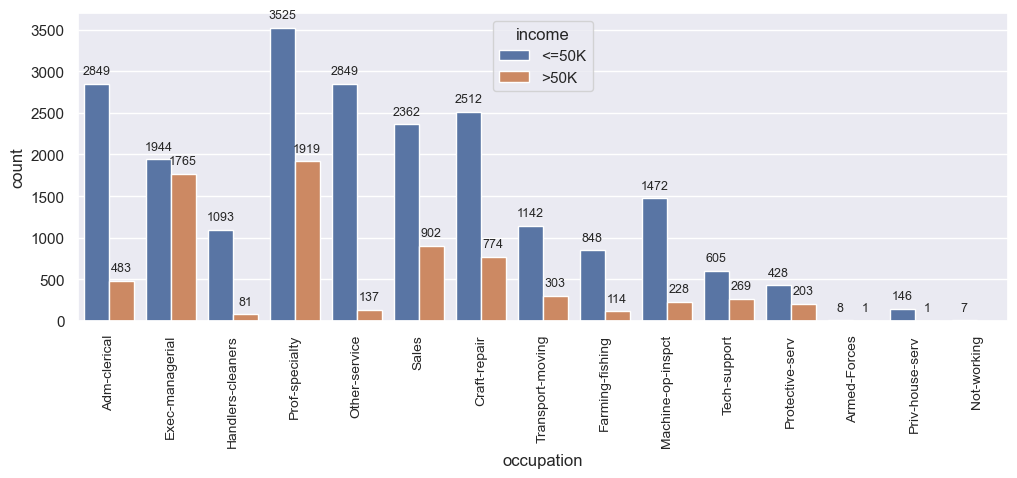

In [368]:
plt.figure(figsize = (12, 4))
ax = sns.countplot(eda_df['occupation'], hue = eda_df['income'])
ax.tick_params(axis = 'x',labelsize = 10, labelrotation = 90)

# Getting labels on top of bars to better visualise the categories with very less count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=9)

###### People with occupation as Exec-managerial have most chances of earning more than 50K which makes sense because managers and executives are usually paid more. Still prof-specialty has more people earning more than 50K because of the higher count of people in that occupation.

### Relationship  vs Income columns

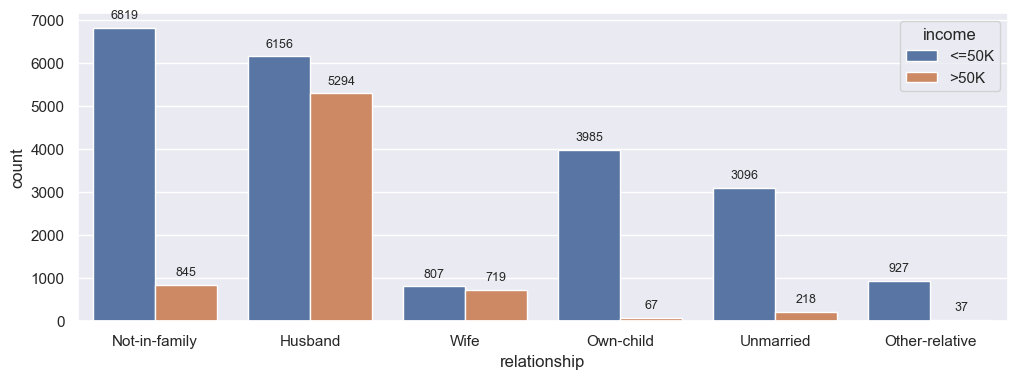

In [369]:
plt.figure(figsize = (12, 4))
ax = sns.countplot(eda_df['relationship'], hue = eda_df['income'])

# Getting labels on top of bars to better visualise the categories with very less count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=9)

###### This shows that married people (be it husband or wife) have more chances of earning more than 50K.

### Race  vs Income columns

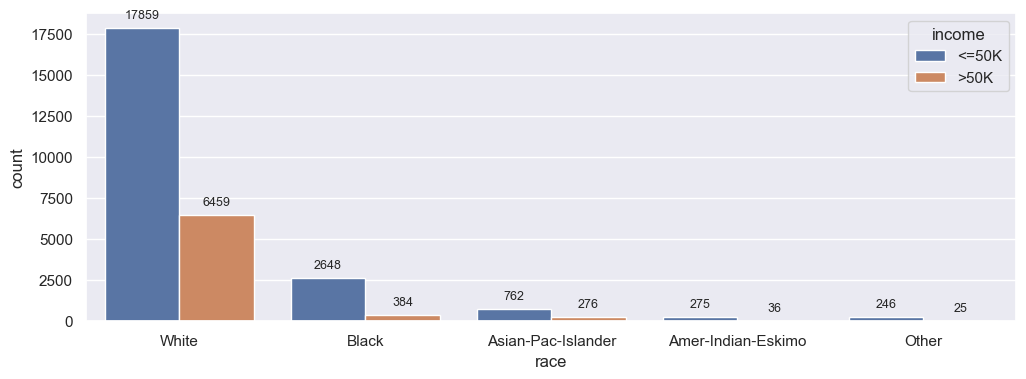

In [370]:
plt.figure(figsize = (12, 4))
ax = sns.countplot(eda_df['race'], hue = eda_df['income'])

# Getting labels on top of bars to better visualise the categories with very less count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=9)

###### The higher probability of earning more than 50K is for people who belong to white or to some extent Asian-Pac-islander race.

### Gender  vs Income columns

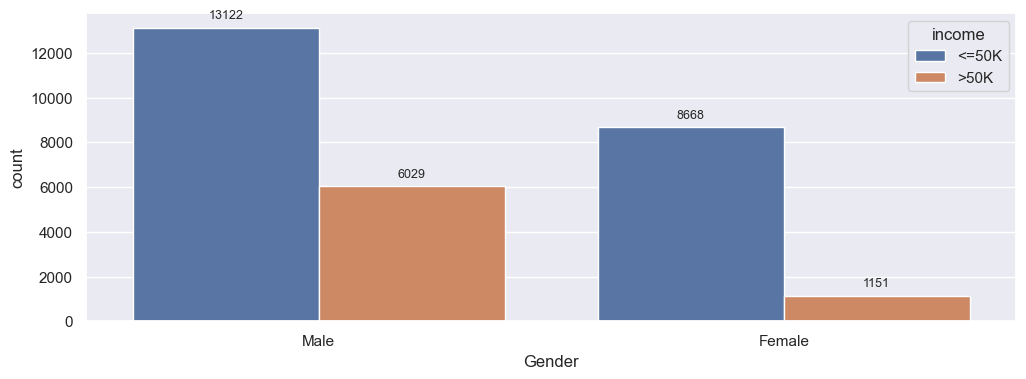

In [371]:
plt.figure(figsize = (12, 4))
ax = sns.countplot(eda_df['Gender'], hue = eda_df['income'])

# Getting labels on top of bars to better visualise the categories with very less count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=9)

###### Males have a better chance at earning more than 50K compared to females.

## Multivariate Analysis

### Age, Hours-per-week and Income columns

<AxesSubplot:xlabel='Age', ylabel='hours-per-week'>

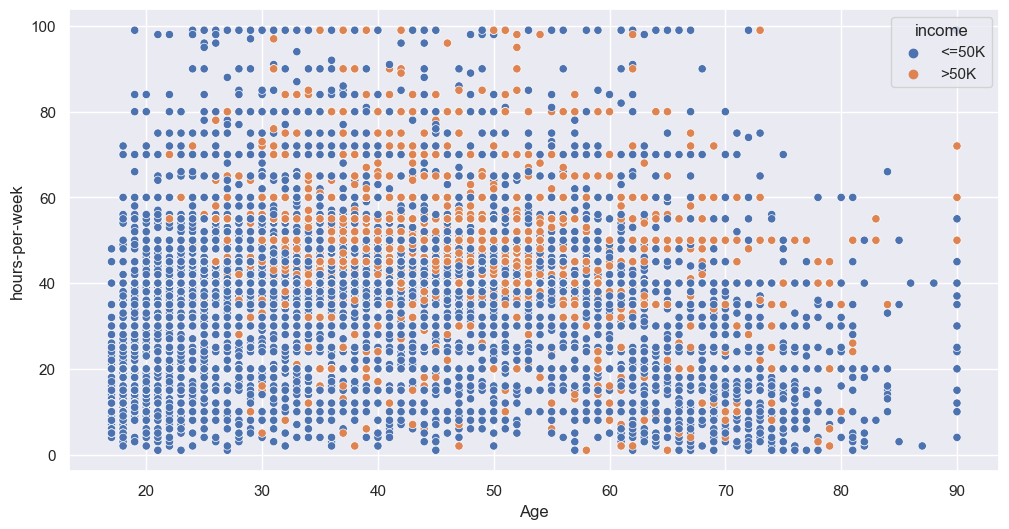

In [372]:
plt.figure(figsize = (12, 6))
sns.scatterplot(eda_df['Age'], eda_df['hours-per-week'], hue = eda_df['income'])

###### After plotting scatterplot for 2 numeric variables (age and hrs/week) with income as hue, we observe that the probability of earning more than 50K is more for people with age more than 30. For younger people, they need to work for 60 hrs/week or more to earn more than 50K.

### Heatmap for checking Multicollinearity

<AxesSubplot:>

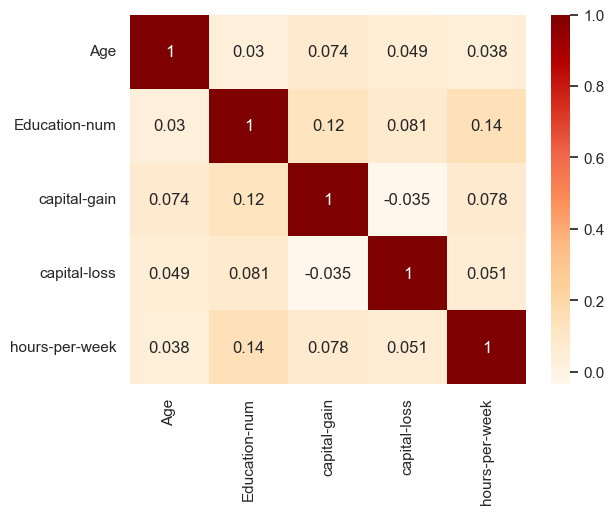

In [373]:
sns.heatmap(eda_df.corr(), annot = True, cmap = 'OrRd')

###### There is no strong correlation between two features, so all the columns can be taken forward for Model Building. 
###### With this, we are done with EDA and will move to modelling.

In [374]:
eda_df.to_csv('Data_inc_EDA.csv', index = False)  # Exporting dataset to a different csv file for modelling